In [1]:
%load_ext autoreload

In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('../../analysis')))
from xa.proc.exp import Experiment

x = Experiment(
    name="Asymmetric Run 1h",
    i1='1',
    i2='2',
    i3='3',
    # ... add more iterations here
)

In [3]:
# iqr cleaning
# NOTE: recompute stats and summary
x.iqrclean(cuT=1.5, muT=1.5, rqlT=1.5, rqtT=1.5, rstT=1.5) # thresholds for defining lower and upper fences

In [4]:
import pandas as pd
import numpy as np

# (un)comment for selecting display precision for floats
pd.options.display.float_format = None # reset
pd.options.display.float_format = np.format_float_positional # dynamic
pd.options.display.float_format = "{:.3f}".format # fixed

# N = number of elements
# numpy.std is biased, divides by N (population), ddof by default is 0
# pandas.std is unbiased, divides by N-1 (sample), ddof by default is 1

x.stats

count  mean  std bias  std unbias   min   25%  \
iter stat                                                                     
i1   cpu usage             9880.000 1.316     1.406       1.406 0.004 0.354   
     memory usage         10567.000 0.685     0.694       0.694 0.031 0.216   
     request latency       3010.000 0.005     0.000       0.000 0.004 0.005   
     request throughput    3139.000 9.426     1.202       1.203 7.102 9.049   
     response time      1535581.000 4.256     6.793       6.793 0.000 0.000   
i2   cpu usage             9685.000 1.451     1.588       1.588 0.004 0.361   
     memory usage         10568.000 0.682     0.700       0.700 0.030 0.164   
     request latency       3004.000 0.006     0.000       0.000 0.004 0.005   
     request throughput    3140.000 9.427     1.204       1.204 7.109 9.046   
     response time      1543649.000 4.235     6.782       6.782 0.000 0.000   
i3   cpu usage             9779.000 1.402     1.513       1.513 0.004 0.352   
     memory usage         10580.000 0.682     0.690       0.690 0.031 0.174   
     request latency       2995.000 0.006     0.000       0.000 0.004 0.005   
     request throughput    3140.000 9.427     1.204       1.205 7.017 9.052   
     response time      1543270.000 4.237     6.783       6.783 0.000 0.000   

                          50%    75%    max  ci 95% -  ci 95% +  ci 99% -  \
iter stat                                                                   
i1   cpu usage          0.603  2.269  5.953     1.289     1.344     1.280   
     memory usage       0.346  1.204  2.711     0.672     0.698     0.667   
     request latency    0.005  0.006  0.007     0.005     0.005     0.005   
     request throughput 9.092 10.066 13.977     9.384     9.468     9.371   
     response time      0.000 15.103 31.611     4.246     4.267     4.242   
i2   cpu usage          0.613  2.605  6.852     1.420     1.483     1.410   
     memory usage       0.349  1.186  2.720     0.668     0.695     0.664   
     request latency    0.005  0.006  0.007     0.005     0.006     0.005   
     request throughput 9.092 10.066 13.975     9.385     9.469     9.372   
     response time      0.000 15.103 30.720     4.224     4.246     4.221   
i3   cpu usage          0.606  2.461  6.471     1.372     1.432     1.363   
     memory usage       0.346  1.151  2.766     0.669     0.696     0.665   
     request latency    0.005  0.006  0.007     0.006     0.006     0.006   
     request throughput 9.092 10.065 13.976     9.384     9.469     9.371   
     response time      0.000 15.103 30.720     4.226     4.248     4.223   

                         ci 99% +  
iter stat                          
i1   cpu usage              1.353  
     memory usage           0.702  
     request latency        0.005  
     request throughput     9.482  
     response time          4.271  
i2   cpu usage              1.493  
     memory usage           0.699  
     request latency        0.006  
     request throughput     9.482  
     response time          4.249  
i3   cpu usage              1.441  
     memory usage           0.700  
     request latency        0.006  
     request throughput     9.482  
     response time          4.251

In [5]:
x.summary

,mean of means,std of means bias,std of means unbias
cpu usage,1.390,0.056,0.068
response time,4.243,0.010,0.012
memory usage,0.683,0.001,0.002
request throughput,9.427,0.000,0.000
request latency,0.005,0.000,0.000


In [6]:
%autoreload 2
from xa.draw.plot import Figure, Pairwise

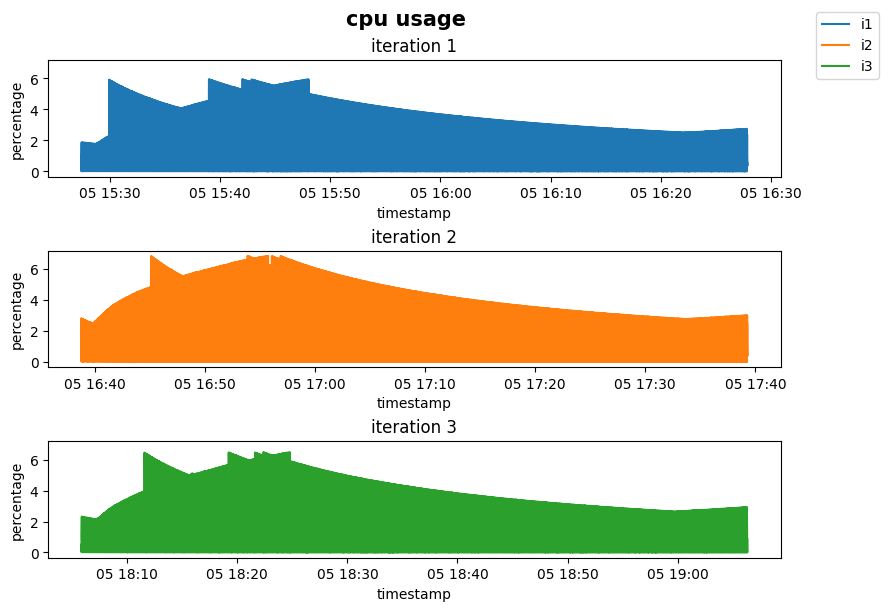

In [7]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.cpu.usage.TS, y=x.i1.metric.cpu.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.cpu.usage.TS, y=x.i2.metric.cpu.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.cpu.usage.TS, y=x.i3.metric.cpu.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='cpu usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

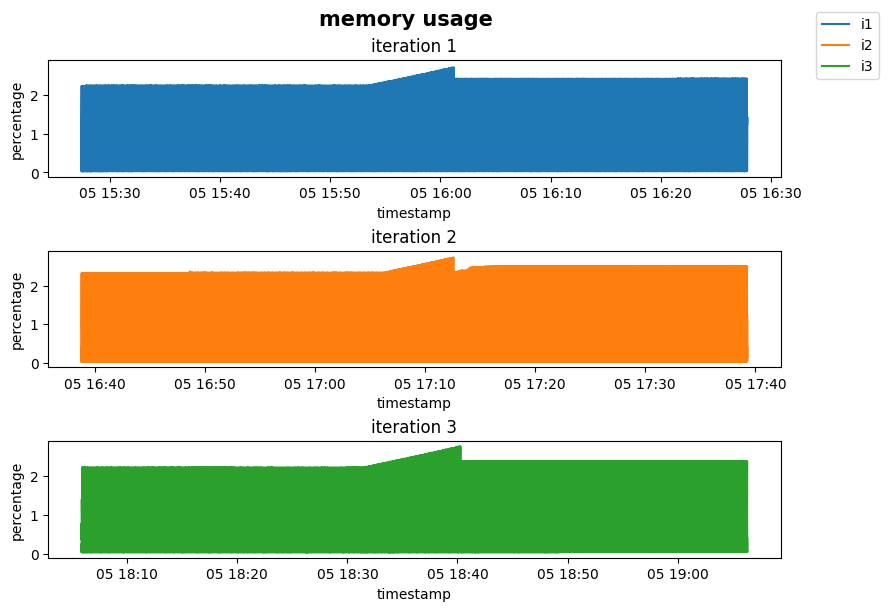

In [8]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.memory.usage.TS, y=x.i1.metric.memory.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.memory.usage.TS, y=x.i2.metric.memory.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.memory.usage.TS, y=x.i3.metric.memory.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='memory usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

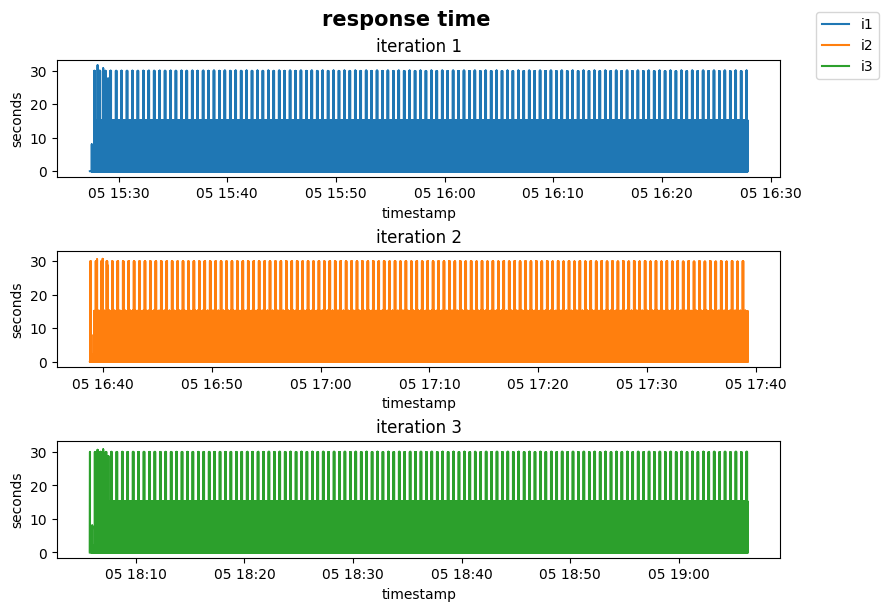

In [9]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.response.time.TS, y=x.i1.metric.response.time.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.response.time.TS, y=x.i2.metric.response.time.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.response.time.TS, y=x.i3.metric.response.time.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='response time', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

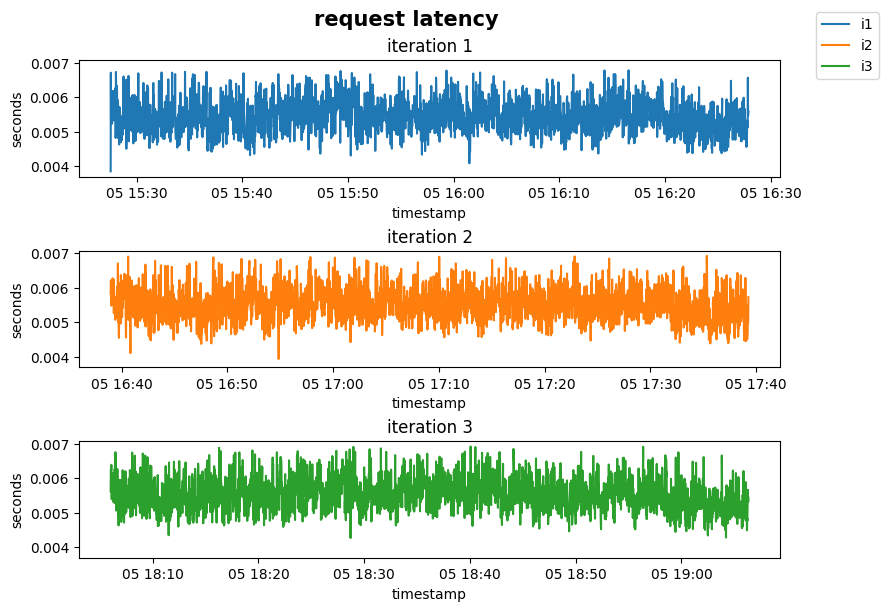

In [10]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.latency.TS, y=x.i1.metric.request.latency.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.request.latency.TS, y=x.i2.metric.request.latency.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.request.latency.TS, y=x.i3.metric.request.latency.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='request latency', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

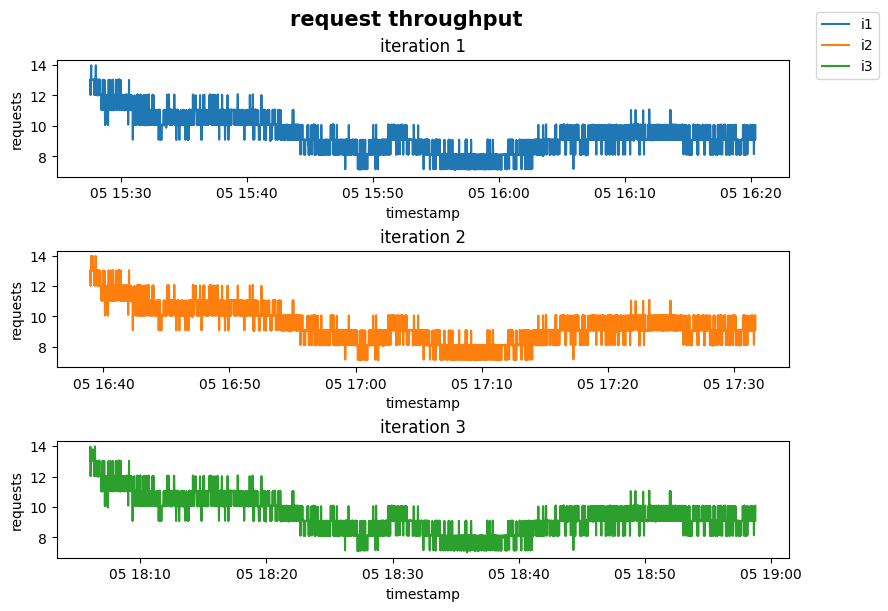

In [11]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.throughput.TS, y=x.i1.metric.request.throughput.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i2.metric.request.throughput.TS, y=x.i2.metric.request.throughput.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i3.metric.request.throughput.TS, y=x.i3.metric.request.throughput.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='requests'),
    title='request throughput', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig